Climaf version = 0.12.3
Cache directory set to : /data/jservon/climaf_cache (use $CLIMAF_CACHE if set) 
Available macros read from ~/.climaf.macros are : []

Hostname: ciclad-ng.private.ipsl.fr
exiv2 is not installed so you can not use 'eps' output format


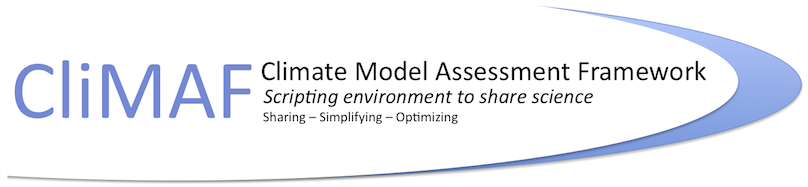

In [1]:
from atlas_explorer import *
clog('critical')
from IPython.display import Image
Image(filename='/home/jservon/Evaluation/CliMAF/Demo-Notebooks/CliMAF-logo-small.png') 

# 

#The strict minimum you need to do

###Specify the simulations you want to analyse

In [3]:
simulations = [
    {'CustomName':'IPSL-CM5A-LR CMIP5', 'model': 'IPSL-CM5A-LR', 'experiment':'historical',
         'period':'1980-2000', 'frequency':'monthly','project':'CMIP5'},
    
#    {'CustomName':'CNRM-CM5 CMIP5', 'model': 'CNRM-CM5', 'experiment':'historical',
#         'period':'1980-2000', 'frequency':'monthly','project':'CMIP5'},
    
]

###Specify the variables in a list

In [3]:
cscript('get_varlev','cdo intlevel,${lev} -selvar,${var} ${in} ${out}')

derive('*','so200','get_varlev','so',lev=200)
derive('*','so1000','get_varlev','so',lev=1000)
derive('*','so2000','get_varlev','so',lev=2000)
derive('*','to200','get_varlev','thetao',lev=200)
derive('*','to1000','get_varlev','thetao',lev=1000)
derive('*','to2000','get_varlev','thetao',lev=2000)




In [ ]:

cscript('field_anom','cdo subc,${mean_field} -selvar,${var} ${in} ${out}')
derive

In [6]:
#variables   = ['tos','to200','to1000','sos','so200','so1000']
variables = ['omldmax']

wkwargs = kwargs.copy()
wkwargs.update({'plot_climato':False,
                'page_title':'Climato and Bias map ${variable} (vs ${product})','ref_contours':True})

climbias_explorer(simulations,variables, **wkwargs)

Dataset =  {'CustomName': 'IPSL-CM5A-LR CMIP5', 'period': '1980-2000', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'variable': 'mlotst', 'model': 'IPSL-CM5A-LR'}
variable =  omldmax
!!!
!!! No reference defined in variable2reference for variable omldmax
!!! Edit reference.py in the atlas_explorer module to define a reference
!!!


TypeError: ds() argument after ** must be a mapping, not NoneType

###And run the climbias_explorer like this
#### First argument = panels on the pages
#### Second argument = pages of the pdf document
#### third argument = a dictionary of keyword-value pairs that pass specifications to the plotting, the reference used... (kwargs is loaded with the package)

Dataset =  {'CustomName': 'IPSL-CM5A-LR CMIP5', 'period': '1980-2000', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'variable': 'sic', 'model': 'IPSL-CM5A-LR', 'climatology': 'September'}
variable =  {'ref_contours': True, 'aux_options': 'cnLineThicknessF=10', 'proj': 'NH', 'variable': 'sic', 'climatology': 'March', 'contours': 15}
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sic/NSIDC/ac/sic_OImon_NSIDC_observations_198001-199912-clim.nc
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sic/NSIDC/ac/sic_OImon_NSIDC_observations_198001-199912-clim.nc
{'domain': 'global', 'period': fx, 'simulation': 'N/A', 'project': 'ref_climatos', 'frequency': 'annual_cycle', 'variable': 'sic', 'product': 'NSIDC', 'clim_period': '*'}
-- simulation = r1i1p1
-- model = IPSL-CM5A-LR
/prodigfs/project/CMIP5/main/IPSL/IPSL-CM5A-LR/historical/mon/seaIce/OImon/r1i1p1/v20111010/sic/sic_OImon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc
{'domain': 'g

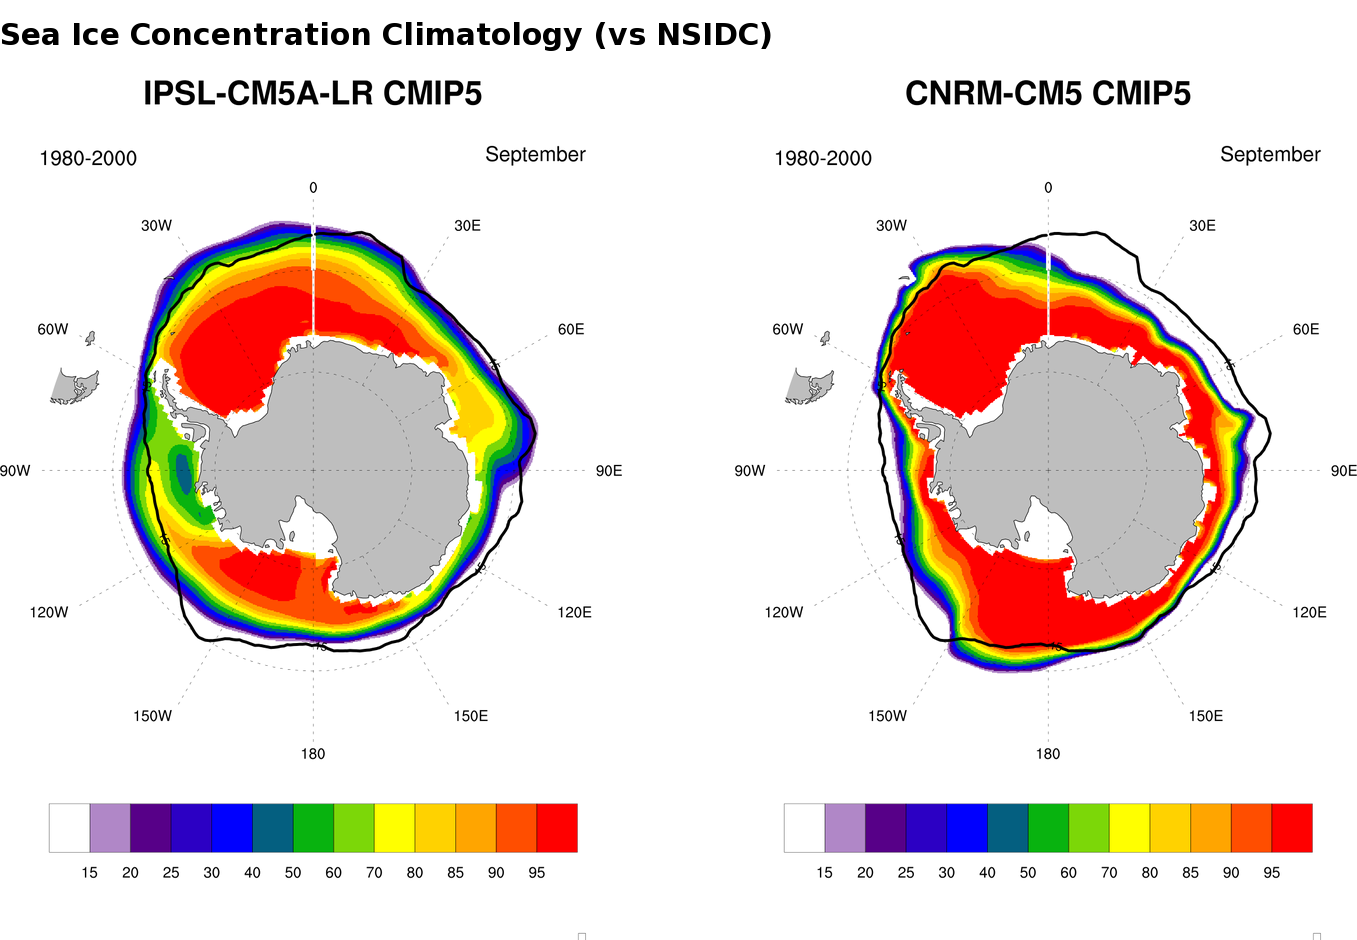

In [5]:
#crm(pattern='NSIDC')
clog('critical')
wkwargs = kwargs.copy()
wkwargs.update({'plot_bias':False,
                'page_title':'Sea Ice Concentration Climatology (vs ${product})'})

variables   = [{'variable':'sic','proj':'NH','climatology':'March','ref_contours':True,
                'contours':15,'aux_options':'cnLineThicknessF=10'},
               {'variable':'sic','proj':'SH','climatology':'September','ref_contours':True,
                'contours':15,'aux_options':'cnLineThicknessF=10'}
              ]
climbias_explorer(simulations,variables, **wkwargs)

In [9]:
help(climbias_explorer)

Help on function climbias_explorer in module atlas_explorer.atlas_explorer_functions:

climbias_explorer(panels, pages, show_last_plot=True, **kwargs)
    The function climbias_explorer() returns a pdf document composed of pages showing several simulations
    for one variable (and one variable per page), or several variables for one simulation (and one
    simulation per page).
    
    It offers many possibilities; among the most interesting, the user can:
        - easily create an inter-atlas (atlas to compare several simulations) for multiple variables
        - plot either the climatology, or the bias map, or both
        - plot differences against a reference or another chosen simulation
        - iterate on multiple time steps / periods to see the diagnostic
          evoluting with time (via the definition of the simulations)
        - plot the four seasons on the same page (via the definition of the simulations)
    
    climbias_explorer computes the climatology, regrids the

#Then, if you want to modify the plot, you can control it with the following keywords
###First, you make a copy of kwargs (working_kwargs) that you will use to avoid modifying kwargs directly
###Then, you update working_kwargs with a dictionary containing the keyword-value pairs that you target
###Note that the values presented here are the default values coming with kwargs

In [5]:
help(climbias_explorer)

Help on function climbias_explorer in module atlas_explorer.atlas_explorer_functions:

climbias_explorer(panels, pages, show_last_plot=True, **kwargs)
    The function climbias_explorer() returns a pdf document composed of pages showing several simulations
    for one variable (and one variable per page), or several variables for one simulation (and one
    simulation per page).
    
    It offers many possibilities; among the most interesting, the user can:
        - easily create an inter-atlas (atlas to compare several simulations) for multiple variables
        - plot either the climatology, or the bias map, or both
        - plot differences against a reference or another chosen simulation
        - iterate on multiple time steps / periods to see the diagnostic
          evoluting with time (via the definition of the simulations)
        - plot the four seasons on the same page (via the definition of the simulations)
    
    climbias_explorer computes the climatology, regrids the

#Custom Atlas setup: a first example
###It will display only the bias maps, with the Metrics ; we specify also the titles

In [10]:
custom_specs = {
    'plot_climato' : False,
    'plot_bias' : True,
    'Metrics'   : True,
    
    # -- Display the plots in portrait or landscape
    'orientation' : 'landscape',
    'show_last_plot': True,
    #'pdffile' : 'atlas.pdf',
    'append':True,
    #
    'page_title':'Bias maps: ${variable} (${product})',
    'ClimPlotMainTitle':'${model} ${simulation}',
    'UpperLeftTitle':'${season}',
    #'reference':{'model': 'IPSLCM5A', 'simulation': 'piControl2pm01', 'login':'p86maf',
    #             'frequency':'seasonal','project':'IGCM_OUT_old'},
    'BiasPlotMainTitle':'${simulation} (vs ${product})',
    }
working_kwargs.update(custom_specs)

##Run the ClimBias Explorer on 'simulations' and the first set of variables

In [11]:
atlas_bias = climbias_explorer(simulations,variables, **working_kwargs)

Done in 0.5 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180')),operator='fldmin') 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180')),operator='fldmax') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.

Dataset =  {'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
variable =  tos
tos
{'project': 'ref_pcmdi', 'variable': 'tos', 'product': 'UKMETOFFICE-HadISST-v1-1'}
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/tos/UKMETOFFICE-HadISST-v1-1/ac/tos_pcmdi-metrics_Omon_UKMETOFFICE-HadISST-v1-1_198002-200501-clim.nc
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/tos/UKMETOFFICE-HadISST-v1-1/ac/tos_pcmdi-metrics_Omon_UKMETOFFICE-HadISST-v1-1_198002-200501-clim.nc
{'domain': 'global', 'period': fx, 'simulation': 'N/A', 'project': 'ref_pcmdi', 'frequency': 'annual_cycle', 'variable': 'tos', 'product': 'UKMETOFFICE-HadISST-v1-1', 'clim_period': '*'}
{'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
-- simulation = CPL6v5.17


Done in 0.5 s with script computation for ccdo(regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180'),operator='fldmean') 


-- Average of dat2 = 291.528


Done in 0.3 s with script computation for ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,290.969') 
Done in 0.3 s with script computation for ccdo(regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180'),operator='subc,291.528') 
Done in 0.2 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,290.969'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180'),operator='subc,291.528')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jserv


Dataset = 


Done in 1.2 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180')),operator='fldmin') 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180')),operator='fldmax') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle

 {'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM5A', 'login': 'p86maf', 'clim_period': '1850_1859'}
variable =  tos
tos
{'project': 'ref_pcmdi', 'variable': 'tos', 'product': 'UKMETOFFICE-HadISST-v1-1'}
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/tos/UKMETOFFICE-HadISST-v1-1/ac/tos_pcmdi-metrics_Omon_UKMETOFFICE-HadISST-v1-1_198002-200501-clim.nc
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/tos/UKMETOFFICE-HadISST-v1-1/ac/tos_pcmdi-metrics_Omon_UKMETOFFICE-HadISST-v1-1_198002-200501-clim.nc
{'domain': 'global', 'period': fx, 'simulation': 'N/A', 'project': 'ref_pcmdi', 'frequency': 'annual_cycle', 'variable': 'tos', 'product': 'UKMETOFFICE-HadISST-v1-1', 'clim_period': '*'}
{'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM5A', 'login': 'p86maf', 'clim_period': '1850_1859'}
-- simulation = piControl2pm01
-- m


Done in 0.4 s with script computation for ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,289.834') 
Done in 0.3 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,289.834'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x180'),operator='subc,291.528')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,289.834'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.tos.fx.global.annual_cycle.UKMETOFFICE-HadISST-v1-1.*')),cdogrid='r360x1


-- Average of dat2 = 291.528
Dataset = 


Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180')),operator='fldmin') 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180')),operator='fldmax') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r3

 {'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
variable =  sos
sos
{'project': 'ref_pcmdi', 'variable': 'sos', 'product': 'NODC-WOA09'}
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sos/NODC-WOA09/ac/sos_pcmdi-metrics_Omon_NODC-WOA09_177201-200812-clim.nc
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sos/NODC-WOA09/ac/sos_pcmdi-metrics_Omon_NODC-WOA09_177201-200812-clim.nc
{'domain': 'global', 'period': fx, 'simulation': 'N/A', 'project': 'ref_pcmdi', 'frequency': 'annual_cycle', 'variable': 'sos', 'product': 'NODC-WOA09', 'clim_period': '*'}
{'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
-- simulation = CPL6v5.17h
-- model = IPSLCM6
//data/jservon/IPSL_DATA/SIMULATIONS/p86fair/IGCM_OUT/IPSLCM6/PROD/piCont


Done in 0.4 s with script computation for ccdo(regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180'),operator='fldmean') 


-- Average of dat2 = 34.6709


Done in 0.3 s with script computation for ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,34.5765') 
Done in 0.3 s with script computation for ccdo(regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180'),operator='subc,34.6709') 
Done in 0.2 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,34.5765'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180'),operator='subc,34.6709')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),


Dataset = 


Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180')),operator='fldmin') 
Done in 0.2 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180')),operator='fldmax') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r3

 {'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM5A', 'login': 'p86maf', 'clim_period': '1850_1859'}
variable =  sos
sos
{'project': 'ref_pcmdi', 'variable': 'sos', 'product': 'NODC-WOA09'}
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sos/NODC-WOA09/ac/sos_pcmdi-metrics_Omon_NODC-WOA09_177201-200812-clim.nc
/data/jservon/Evaluation/ReferenceDatasets/PCMDI-MP/obs/ocn/mo/sos/NODC-WOA09/ac/sos_pcmdi-metrics_Omon_NODC-WOA09_177201-200812-clim.nc
{'domain': 'global', 'period': fx, 'simulation': 'N/A', 'project': 'ref_pcmdi', 'frequency': 'annual_cycle', 'variable': 'sos', 'product': 'NODC-WOA09', 'clim_period': '*'}
{'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM5A', 'login': 'p86maf', 'clim_period': '1850_1859'}
-- simulation = piControl2pm01
-- model = IPSLCM5A
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/p


Done in 0.3 s with script computation for ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,34.6623') 
Done in 0.2 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,34.6623'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180'),operator='subc,34.6709')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180'),operator='subc,34.6623'),ccdo(regridn(time_average(ds('ref_pcmdi.N/A.sos.fx.global.annual_cycle.NODC-WOA09.*')),cdogrid='r360x180'),operator='subc,34.6709'


-- Average of dat2 = 34.6709
pdfjam --landscape -o ./main_atlas.pdf ./atlas.pdf /data/jservon/climaf_cache/89/8.png /data/jservon/climaf_cache/c7/a.png


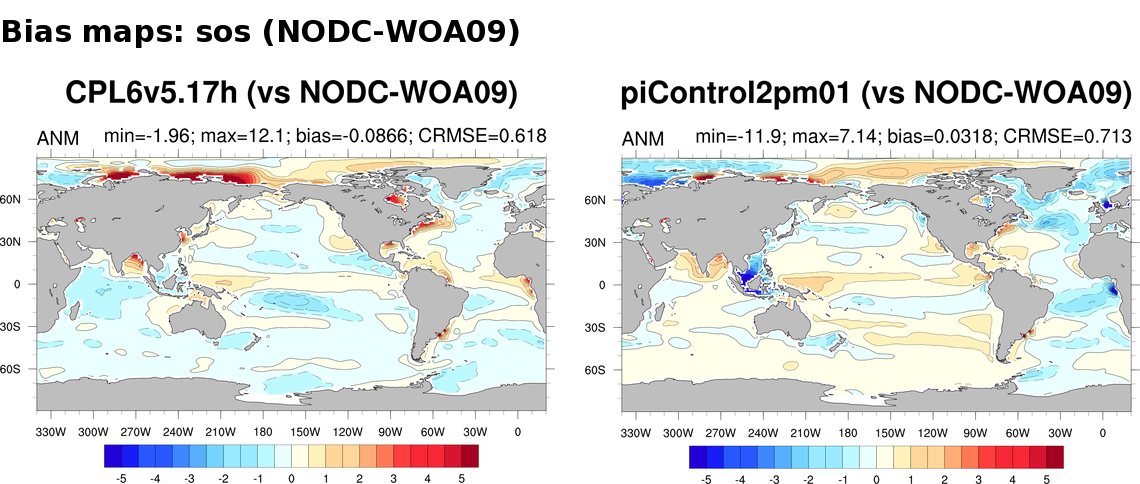

In [13]:
atlas_bias

#Here is an example to use the last simulation of the list as a reference

In [11]:
custom_specs_modelmodel = {
    'plot_climato' : False,
    'pdffile' : 'ModelModel-multisims.pdf',
    'page_title':'Model-model diff: ${variable}',
    'reference':simulations[len(simulations)-1],
    'BiasPlotMainTitle':'${simulation} (vs ${product})',
    }
wsimulations = simulations
del wsimulations[-1]
working_kwargs.update(custom_specs_modelmodel)

In [12]:
atlas_diffmodelmodel = climbias_explorer(wsimulations,variables, **working_kwargs)

Simulation =  {'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T07V01'}
variable =  tos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'tos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T07V01'}
-- simulation = O1T07V01
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86mart/IGCM_OUT/IPSLCM6/DEVT/piControl/O1T07V01/OCE/Analyse/SE/O1T07V01_SE_1850_1859_1M_grid_T.nc

Done in 4.6 s with script computation for minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.8 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 2.6 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data


{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'O1T07V01', 'project': 'IGCM_OUT', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'tos', 'model': 'IPSLCM6', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86mart', 'clim_period': '1850_1859', 'OUT': '*'}

-- Average of dat1 = 290.64


Done in 4.5 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T07V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,290.64'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')) 
Done in 0.4 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T07V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,290.64'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')),operator='sqr') 
Done in 1.0 s with script computation fo


-- Average of dat2 = 289.834
Simulation = 


Done in 0.7 s with script computation for minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.8 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/dat

 {'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T08V01'}
variable =  tos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'tos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T08V01'}
-- simulation = O1T08V01
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86mart/IGCM_OUT/IPSLCM6/DEVT/piControl/O1T08V01/OCE/Analyse/SE/O1T08V01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': '


Done in 0.3 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T08V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.927'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T08V01%tos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.927'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')),operator='sqr') 
Done in 0.4 s with script computation 


Simulation = 


Done in 0.3 s with script computation for minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%a

 {'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
variable =  tos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'tos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
-- simulation = CPL6v5.17h
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86fair/IGCM_OUT/IPSLCM6/PROD/piControl/CPL6v5.17h/OCE/Analyse/SE/CPL6v5.17h_SE_1850_1859_


Done in 0.2 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,290.969'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')) 
Done in 0.3 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%tos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,290.969'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%tos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,289.834')),operator='sqr') 
Done in 0.4 s with


-- Average of dat2 = 289.834
Simulation =  {'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T07V01'}
variable =  sos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'sos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T07V01'}
-- simulation = O1T07V01
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86mart/IGCM_OUT/IPSLCM6/DEVT/piControl/O1T07V01/OCE/Analyse/SE/O1T07V01_SE_1850_1859_1M_grid_T.nc


Done in 0.5 s with script computation for minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T07V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/dat


{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'O1T07V01', 'project': 'IGCM_OUT', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'sos', 'model': 'IPSLCM6', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86mart', 'clim_period': '1850_1859', 'OUT': '*'}

-- Average of dat1 = 34.6378


Done in 0.4 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T07V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6378'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')) 
Done in 0.4 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T07V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6378'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')),operator='sqr') 
Done in 0.5 s with script computation 


-- Average of dat2 = 34.6623
Simulation = 


Done in 0.5 s with script computation for minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT%O1T08V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/dat

 {'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T08V01'}
variable =  sos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'sos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'project': 'IGCM_OUT', 'frequency': 'seasonal', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86mart', 'simulation': 'O1T08V01'}
-- simulation = O1T08V01
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86mart/IGCM_OUT/IPSLCM6/DEVT/piControl/O1T08V01/OCE/Analyse/SE/O1T08V01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': '


Done in 0.5 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T08V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.5454'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')) 
Done in 0.8 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT%O1T08V01%sos%fx%global%1850_1859%IPSLCM6%seasonal%*%*%*%p86mart%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.5454'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')),operator='sqr') 
Done in 0.4 s with script computation 


-- Average of dat2 = 34.6623
Simulation = 


Done in 0.5 s with script computation for minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')) 
Done in 0.4 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil')),operator='fldmin') 
Done in 0.3 s with script computation for ccdo(minus(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%a

 {'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'tos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
variable =  sos
//data/jservon/IPSL_DATA/SIMULATIONS/p86maf/IGCM_OUT/IPSLCM5A/DEVT/piControl/piControl2pm01/OCE/Analyse/SE/piControl2pm01_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'piControl2pm01', 'project': 'IGCM_OUT_old', 'frequency': 'seasonal', 'DIR': '*', 'variable': 'sos', 'model': 'IPSLCM5A', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86maf', 'clim_period': '1850_1859', 'OUT': '*'}
{'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'sos', 'model': 'IPSLCM6', 'login': 'p86fair', 'clim_period': '1850_1859'}
-- simulation = CPL6v5.17h
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86fair/IGCM_OUT/IPSLCM6/PROD/piControl/CPL6v5.17h/OCE/Analyse/SE/CPL6v5.17h_SE_1850_1859_


Done in 0.2 s with script computation for minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.5765'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')) 
Done in 0.4 s with script computation for ccdo(minus(ccdo(regridn(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sos%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.5765'),ccdo(regridn(time_average(ds('IGCM_OUT_old%piControl2pm01%sos%fx%global%1850_1859%IPSLCM5A%seasonal%*%*%*%p86maf%/data/jservon/IPSL_DATA/SIMULATIONS')),cdogrid='r360x180',option='remapbil'),operator='subc,34.6623')),operator='sqr') 
Done in 0.5 s with


-- Average of dat2 = 34.6623
pdfjam --landscape -o ModelModel-multisims.pdf /data/jservon/climaf_cache/24/d.png /data/jservon/climaf_cache/d0/b.png


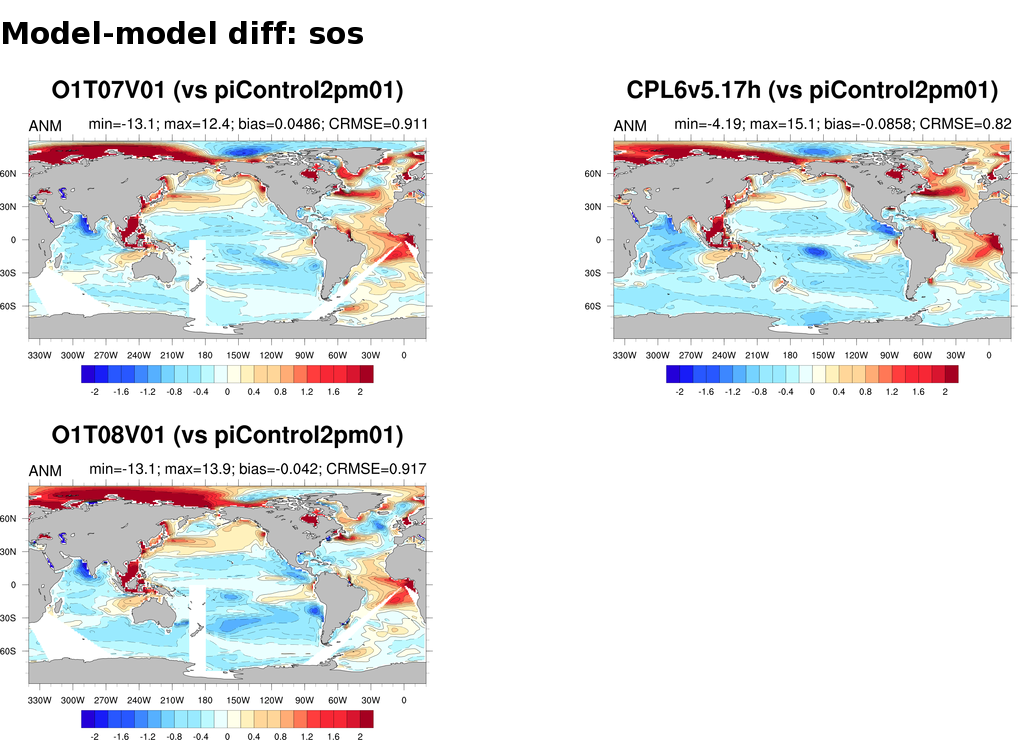

In [13]:
atlas_diffmodelmodel

# 
#It is also possible to pass plotting specifications for one variable ; here we want to plot the sea ice concentration for the NH and the SH next to the other

In [17]:
simulations = [
    {'model': 'IPSLCM6',  'simulation': 'CPL6v5.17h',
     'login':'p86fair', 'frequency':'annual_cycle','project':'IGCM_OUT_old','season': 'September'},
]
variables = [
    {'variable':'sic','proj':'NH','scale':0.01,'colors':'0 0.1 0.2 0.3 0.5 0.7 0.9'}, # Changed the scale and isolines
    {'variable':'sic','proj':'SH'}
]

In [18]:
working_kwargs = kwargs.copy()
custom_specs_seaice = {
    'plot_climato' : True,
    'plot_bias' : False,
    'pdffile' : 'SeaIce.pdf',
    'page_title':'Sea Ice Cover Climatology: ${simulation}',
    'ClimPlotMainTitle':'${simulation}',
    }
working_kwargs.update(custom_specs_seaice)
seaice_atlas = climbias_explorer(variables,simulations, **working_kwargs)

Simulation =  {'season': 'September', 'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'model': 'IPSLCM6', 'login': 'p86fair'}
variable =  {'variable': 'sic', 'colors': '0 0.1 0.2 0.3 0.5 0.7 0.9', 'scale': 0.01, 'proj': 'NH'}
{'season': 'September', 'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'variable': 'sic', 'model': 'IPSLCM6', 'login': 'p86fair'}
-- simulation = CPL6v5.17h
-- model = IPSLCM6
-- period = 1850_1859
//data/jservon/IPSL_DATA/SIMULATIONS/p86fair/IGCM_OUT/IPSLCM6/PROD/piControl/CPL6v5.17h/OCE/Analyse/SE/CPL6v5.17h_SE_1850_1859_1M_grid_T.nc
{'domain': 'global', 'experiment': '*', 'period': fx, 'simulation': 'CPL6v5.17h', 'project': 'IGCM_OUT_old', 'frequency': 'annual_cycle', 'DIR': '*', 'variable': 'sic', 'model': 'IPSLCM6', 'root': '/data/jservon/IPSL_DATA/SIMULATIONS', 'login': 'p86fair', 'clim_period': '1850_1859', 'OUT': '*'}

{'vcb': False, 'scale': 0.01, 'tiMainFontHeightF': 0.035, 'color':

Done in 4.8 s with script computation for plot(time_average(ds('IGCM_OUT_old%CPL6v5.17h%sic%fx%global%1850_1859%IPSLCM6%annual_cycle%*%*%*%p86fair%/data/jservon/IPSL_DATA/SIMULATIONS')),color='WhViBlGrYeOrRe',colors='0 0.1 0.2 0.3 0.5 0.7 0.9',contours=1,focus='ocean',gsnCenterString='',gsnLeftString='1850_1859',gsnRightString='ANM',gsnStringFontHeightF=0.022,mpCenterLonF=0,proj='NH',resolution='1500x1500',scale=0.01,tiMainFontHeightF=0.035,title='CPL6v5.17h',units='%',vcb=False) 


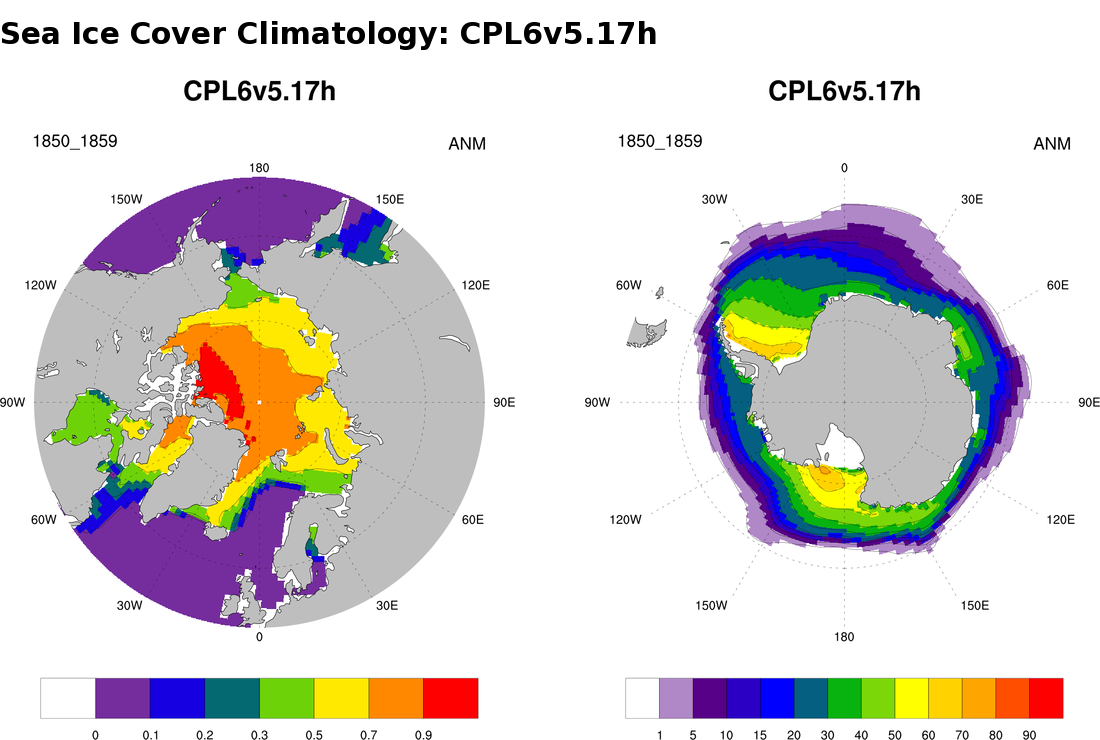

In [19]:
seaice_atlas